<a href="https://colab.research.google.com/github/gauravarya18/Autism-Gesture/blob/master/Gesture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.4.0


In [ ]:
 !pip install mlxtend==0.17.3

     |████████████████████████████████| 1.3MB 8.6MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import mlxtend as mxl
print(mxl.__version__)

0.17.3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
from sklearn.preprocessing import StandardScaler
data = [[1, 0], [2, 0], [3, 1], [4, 1],[5, 1],[6, 1]]
scaler = StandardScaler()
print(scaler.fit_transform(data))

[[-1.46385011 -1.41421356]
 [-0.87831007 -1.41421356]
 [-0.29277002  0.70710678]
 [ 0.29277002  0.70710678]
 [ 0.87831007  0.70710678]
 [ 1.46385011  0.70710678]]


#Adding Gesture

In [ ]:
## Adding new Gestures // same as file name
Gesture=[]
# Gesture.append("XY")
# Gesture.append("Z1")
# Gesture.append("S1")
# Gesture.append("X1")
# Gesture.append("Y1")
Gesture.append("RotX")
Gesture.append("RotY")
Gesture.append("RotZ")
# Gesture.append("X+Z")


#Loading Data

In [ ]:
Gyro=[]
Acc=[]
for action in Gesture:
  xx = pd.read_csv(action+'.csv',names=["Type","X","Y","Z"])
  data_gyro=[]
  data_gyro = xx[xx.Type==1]
  data_gyro = data_gyro[['X','Y', 'Z']]
  data_acc=[]
  data_acc = xx[xx.Type==2]
  data_acc = data_acc[['X','Y', 'Z']]
  for index,row in data_gyro.iterrows():
    Gyro.append([action,row['X'],row['Y'],row['Z']])
  for index,row in data_acc.iterrows():
    Acc.append([action,row['X'],row['Y'],row['Z']])

In [ ]:
# for action in Gesture:
#   xx = pd.read_csv('Gyro'+action+'.csv',names=["Type","X","Y","Z"])
#   data_gyro=[]
#   data_gyro = xx[xx.Type==1]
#   data_gyro = data_gyro[['X','Y', 'Z']]
#   data_acc=[]
#   data_acc = xx[xx.Type==2]
#   data_acc = data_acc[['X','Y', 'Z']]
#   for index,row in data_gyro.iterrows():
#     Gyro.append([action,row['X'],row['Y'],row['Z']])
#   for index,row in data_acc.iterrows():
#     Acc.append([action,row['X'],row['Y'],row['Z']])

In [ ]:
print(Gyro)

[['RotX', -0.044216399999999996, -0.407152, 0.0990391], ['RotX', -0.0825659, -0.345367, 0.0979738], ['RotX', -0.142753, 0.0370625, 0.122475], ['RotX', -0.21093, 0.374751, 0.19278199999999998], ['RotX', -0.00799742, 0.34226, 0.144845], ['RotX', 0.268438, 0.213364, 0.136323], ['RotX', 0.315843, 0.163829, 0.153368], ['RotX', 0.164043, 0.216559, 0.10969200000000001], ['RotX', -0.0532711, 0.172351, 0.033525400000000004], ['RotX', -0.186962, -0.104618, -0.00961782], ['RotX', -0.20081, -0.441241, -0.0921757], ['RotX', -0.211995, -0.524864, -0.136384], ['RotX', -0.227442, -0.244167, -0.110818], ['RotX', -0.171515, 0.183004, -0.06288099999999999], ['RotX', -0.149145, 0.44612399999999997, -0.029857799999999997], ['RotX', -0.232235, 0.496191, 0.026601099999999996], ['RotX', -0.0452816, 0.507909, 0.110757], ['RotX', 0.44420699999999996, 0.571292, 0.182662], ['RotX', 0.553929, 0.570759, 0.198641], ['RotX', 0.213977, 0.9553200000000001, 0.710767], ['RotX', 0.027955200000000003, 0.777421, 0.651245], 

In [ ]:
print(Acc)

[['RotX', -1.2897299999999998, 2.28744, 0.0872793], ['RotX', -1.6538400000000002, 2.38805, 0.31245500000000004], ['RotX', -1.63467, 2.49106, -0.952357], ['RotX', -1.56521, 2.38805, -1.9800200000000001], ['RotX', -1.1771399999999999, 2.25391, -1.7452599999999998], ['RotX', -1.146, 2.2515099999999997, -0.5307529999999999], ['RotX', -1.46699, 2.36649, 0.405879], ['RotX', -1.63467, 2.40482, 0.403482], ['RotX', -1.43345, 2.206, -0.5690810000000001], ['RotX', -1.37836, 2.24911, -0.952357], ['RotX', -1.33764, 2.28265, -0.166641], ['RotX', -1.67061, 2.34733, 0.20465899999999998], ['RotX', -1.91255, 2.3952400000000003, -0.31516], ['RotX', -1.7855900000000002, 2.58688, -0.571476], ['RotX', -1.48136, 2.76893, -0.226528], ['RotX', -1.98921, 2.8384, -1.22784], ['RotX', -1.7508599999999999, 1.9688400000000001, 0.929291], ['RotX', 0.358363, 1.7221099999999998, -0.470867], ['RotX', 0.353572, 1.4298600000000001, -0.280426], ['RotX', -0.22493600000000002, 1.2058799999999998, 0.185495], ['RotX', -1.01544

In [ ]:
columns = ['action','x', 'y', 'z']
dataGyro = pd.DataFrame(data = Gyro, columns = columns)
dataAcc = pd.DataFrame(data = Acc, columns = columns)
print(dataGyro)
print(dataAcc)

      action         x         y         z
0       RotX -0.044216 -0.407152  0.099039
1       RotX -0.082566 -0.345367  0.097974
2       RotX -0.142753  0.037062  0.122475
3       RotX -0.210930  0.374751  0.192782
4       RotX -0.007997  0.342260  0.144845
...      ...       ...       ...       ...
10774   RotZ -0.030368 -0.097693  3.371530
10775   RotZ -0.028237  0.027475  3.131310
10776   RotZ -0.029835 -0.027386  2.946490
10777   RotZ -0.034096 -0.068931  2.516120
10778   RotZ -0.026107 -0.071062  1.769370

[10779 rows x 4 columns]
     action         x         y         z
0      RotX -1.289730  2.287440  0.087279
1      RotX -1.653840  2.388050  0.312455
2      RotX -1.634670  2.491060 -0.952357
3      RotX -1.565210  2.388050 -1.980020
4      RotX -1.177140  2.253910 -1.745260
...     ...       ...       ...       ...
6762   RotZ  0.705468 -0.840574  0.017332
6763   RotZ  0.449870 -1.608080  0.030027
6764   RotZ  0.301111 -3.125380 -0.002550
6765   RotZ -1.243250 -2.529870  0.023

In [ ]:
dfGyro=dataGyro.copy()
dfAcc=dataAcc.copy()

#Balancing

##Gyro

In [ ]:
xxx = dfGyro['action'].value_counts()

In [ ]:
minValue = int(min(xxx))
dataGyro = pd.DataFrame()
for action in Gesture:
  A = dfGyro[dfGyro['action']==action].head(minValue).copy()
  dataGyro = dataGyro.append(A)
dataGyro.shape
dataGyro.info

<bound method DataFrame.info of       action         x         y         z
0       RotX -0.044216 -0.407152  0.099039
1       RotX -0.082566 -0.345367  0.097974
2       RotX -0.142753  0.037062  0.122475
3       RotX -0.210930  0.374751  0.192782
4       RotX -0.007997  0.342260  0.144845
...      ...       ...       ...       ...
10184   RotZ -0.043684  0.140926  3.494030
10185   RotZ -0.043684  0.157437  4.171540
10186   RotZ -0.039423  0.232538  4.990200
10187   RotZ -0.023976  0.263964  5.587810
10188   RotZ  0.003188  0.258637  5.668770

[9453 rows x 4 columns]>

In [ ]:
dataGyro['action'].value_counts()

RotX    3151
RotY    3151
RotZ    3151
Name: action, dtype: int64

##Acc

In [ ]:
xxx=dfAcc['action'].value_counts()

In [ ]:
dfAcc['action'].value_counts()

RotX    3144
RotY    1867
RotZ    1756
Name: action, dtype: int64

In [ ]:
minValue = int(min(xxx))
dataAcc = pd.DataFrame()
for action in Gesture:
  A = dfAcc[dfAcc['action']==action].head(minValue).copy()
  dataAcc = dataAcc.append(A)
dataAcc.shape
dataAcc.info

<bound method DataFrame.info of      action         x         y         z
0      RotX -1.289730  2.287440  0.087279
1      RotX -1.653840  2.388050  0.312455
2      RotX -1.634670  2.491060 -0.952357
3      RotX -1.565210  2.388050 -1.980020
4      RotX -1.177140  2.253910 -1.745260
...     ...       ...       ...       ...
6762   RotZ  0.705468 -0.840574  0.017332
6763   RotZ  0.449870 -1.608080  0.030027
6764   RotZ  0.301111 -3.125380 -0.002550
6765   RotZ -1.243250 -2.529870  0.023560
6766   RotZ -2.565800 -1.884520 -0.044711

[5268 rows x 4 columns]>

In [ ]:
dataAcc['action'].value_counts()

RotX    1756
RotY    1756
RotZ    1756
Name: action, dtype: int64

#Labelling

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
dataGyro['label'] = label.fit_transform(dataGyro['action'])
dataAcc['label'] = label.fit_transform(dataAcc['action'])

In [ ]:
label.classes_

array(['RotX', 'RotY', 'RotZ'], dtype=object)

#Standardized data 

##Gyro

In [ ]:
dataGyro

,action,x,y,z,label
0,RotX,-0.044216,-0.407152,0.099039,0
1,RotX,-0.082566,-0.345367,0.097974,0
2,RotX,-0.142753,0.037062,0.122475,0
3,RotX,-0.210930,0.374751,0.192782,0
4,RotX,-0.007997,0.342260,0.144845,0
...,...,...,...,...,...
10184,RotZ,-0.043684,0.140926,3.494030,2
10185,RotZ,-0.043684,0.157437,4.171540,2
10186,RotZ,-0.039423,0.232538,4.990200,2
10187,RotZ,-0.023976,0.263964,5.587810,2


In [ ]:
X = dataGyro[['x', 'y', 'z']]
y = dataGyro['label']

In [ ]:
scaler = StandardScaler()
# X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,-0.044216,-0.407152,0.099039,0
1,-0.082566,-0.345367,0.097974,0
2,-0.142753,0.037062,0.122475,0
3,-0.210930,0.374751,0.192782,0
4,-0.007997,0.342260,0.144845,0
...,...,...,...,...
10184,-0.043684,0.140926,3.494030,2
10185,-0.043684,0.157437,4.171540,2
10186,-0.039423,0.232538,4.990200,2
10187,-0.023976,0.263964,5.587810,2


##Acc

In [ ]:
X1 = dataAcc[['x', 'y', 'z']]
y1 = dataAcc['label']
X1

,x,y,z
0,-1.289730,2.287440,0.087279
1,-1.653840,2.388050,0.312455
2,-1.634670,2.491060,-0.952357
3,-1.565210,2.388050,-1.980020
4,-1.177140,2.253910,-1.745260
...,...,...,...
6762,0.705468,-0.840574,0.017332
6763,0.449870,-1.608080,0.030027
6764,0.301111,-3.125380,-0.002550
6765,-1.243250,-2.529870,0.023560


In [ ]:
scaler = StandardScaler()
# X1 = scaler.fit_transform(X1)

scaled_X1 = pd.DataFrame(data = X1, columns = ['x', 'y', 'z'])
scaled_X1['label'] = y1.values

scaled_X1

,x,y,z,label
0,-1.289730,2.287440,0.087279,0
1,-1.653840,2.388050,0.312455,0
2,-1.634670,2.491060,-0.952357,0
3,-1.565210,2.388050,-1.980020,0
4,-1.177140,2.253910,-1.745260,0
...,...,...,...,...
6762,0.705468,-0.840574,0.017332,2
6763,0.449870,-1.608080,0.030027,2
6764,0.301111,-3.125380,-0.002550,2
6765,-1.243250,-2.529870,0.023560,2


#Frame Preparation

In [ ]:
import scipy.stats as stats

In [ ]:
Fs = 40
frame_size = Fs*2 # 10
hop_size = Fs*1 # 1

In [ ]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    print(len(frames))
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

##Gyro

In [ ]:
X, y = get_frames(scaled_X, frame_size, hop_size)

235


In [ ]:
X.shape, y.shape

((235, 80, 3), (235,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify = y)

In [ ]:
print(y_train)

[2 2 2 2 2 0 0 1 2 2 1 2 1 2 1 0 2 0 0 0 1 0 2 1 0 1 0 2 0 0 2 1 0 2 0 0 2
 1 0 1 2 1 2 2 0 1 2 0 2 1 2 0 2 0 2 0 1 0 2 2 0 1 1 1 0 1 2 2 2 2 1 0 0 1
 1 0 2 2 1 2 2 1 2 1 2 2 2 0 0 1 0 0 1 2 0 0 0 1 1 0 2 0 1 0 2 0 2 1 0 1 1
 0 2 1 0 0 0 2 2 2 1 0 0 2 2 1 0 0 1 1 1 1 2 2 0 2 0 1 1 0 0 1 1 0 1 1 1 0
 1 0 1 0 2 2 0 1 2 1 1 1 2 2 1 1 0 1 0 2 2 0 0 1 2 1 1 0 2 2 1 2 1 1 0 1 1
 2 1 2 1 2 0 0 2 0 1 2 0 0 1]


In [ ]:
print(X_test)

[[[-9.21532e-02 -1.16654e-01 -2.78042e-01]
  [-3.89894e-01 -3.73383e-01 -2.54073e-01]
  [-1.43819e-01 -1.03871e-01 -6.71195e-02]
  ...
  [-3.21740e-01 -4.21875e-01 -4.00037e-01]
  [-2.80727e-01 -1.67277e-01 -7.83273e-02]
  [-4.31736e-02  3.24601e-02  5.37654e-02]]

 [[-3.14332e-02 -1.50210e-01 -2.13593e-01]
  [-2.03473e-01 -1.98680e-01 -1.19317e-01]
  [-1.11932e-02  7.44890e-03 -1.22585e-02]
  ...
  [ 1.96769e-02  1.25671e-01  2.12490e-01]
  [ 2.75340e-01  1.82662e-01  4.31127e-02]
  [ 6.65485e-02  1.40584e-01  1.24073e-01]]

 [[ 4.89942e-02  6.60384e-02 -3.20373e-03]
  [-1.06534e-01 -1.35296e-01 -1.01208e-01]
  [-4.68795e-02 -2.82374e-02 -2.07806e-02]
  ...
  [-1.86452e-01 -2.08031e-02  1.50172e-01]
  [ 1.58161e-01  4.84390e-02 -1.66212e-01]
  [-1.53428e-01 -4.21084e-02 -2.66620e-02]]

 ...

 [[-6.28080e+00 -6.18812e+00 -5.92287e+00]
  [-5.76628e+00 -5.46268e+00 -4.71699e+00]
  [-4.30048e+00 -4.09861e+00 -3.08661e+00]
  ...
  [-6.09361e-01 -8.69818e-01 -6.26405e-01]
  [-3.66481e-01 -2

In [ ]:
X_train.shape, X_test.shape

((199, 80, 3), (36, 80, 3))

In [ ]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [ ]:
train=X_train.shape
test=X_test.shape


In [ ]:
X_train = X_train.reshape(train[0],train[1],train[2],1)
X_test = X_test.reshape(test[0],test[1],test[2],1)

In [ ]:
X_train.shape, X_test.shape

((199, 80, 3, 1), (36, 80, 3, 1))

In [ ]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

##Acc

In [ ]:
X1, y1 = get_frames(scaled_X1, frame_size, hop_size)

130


In [ ]:
X1.shape, y1.shape

((130, 80, 3), (130,))

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.15, random_state = 0, stratify = y1)

In [ ]:
X_test1[0][0][0]

2.1621599999999996

In [ ]:
X_train1.shape, X_test1.shape

((110, 80, 3), (20, 80, 3))

In [ ]:
X_train1[0].shape, X_test1[0].shape

((80, 3), (80, 3))

In [ ]:
train1=X_train1.shape
test1=X_test1.shape

In [ ]:
X_train1 = X_train1.reshape(train1[0],train1[1],train1[2],1)
X_test1 = X_test1.reshape(test1[0],test1[1],test1[2],1)

In [ ]:
X_test1

array([[[[ 2.16216e+00],
         [ 1.14887e+00],
         [ 4.97301e-01]],

        [[-1.47083e-01],
         [-2.49133e-02],
         [-8.14492e-03]],

        [[-3.09975e-01],
         [-4.36936e-01],
         [ 1.46507e+00]],

        ...,

        [[-3.12765e-01],
         [-1.37896e-01],
         [ 1.54354e-01]],

        [[-1.35499e-01],
         [-1.37896e-01],
         [ 1.32793e-01]],

        [[-2.48087e-01],
         [ 8.72793e-02],
         [ 1.66330e-01]]],


       [[[ 6.51235e+00],
         [ 6.09553e+00],
         [ 5.97816e+00]],

        [[ 5.01038e+00],
         [ 3.77432e+00],
         [ 3.52998e+00]],

        [[ 2.65084e+00],
         [ 1.21115e+00],
         [ 1.49622e+00]],

        ...,

        [[-1.92945e+01],
         [-1.78117e+01],
         [-1.52067e+01]],

        [[-1.32963e+01],
         [-1.12529e+01],
         [-1.06744e+01]],

        [[-1.03187e+01],
         [-8.16395e+00],
         [-5.59599e+00]]],


       [[[ 1.98010e+00],
         [ 3.28564e

In [ ]:
X_test1[0][0][0][0]

2.1621599999999996

In [ ]:
X_train1[0].shape, X_test1[0].shape

((80, 3, 1), (80, 3, 1))

#2D CNN Model

##Gyro

In [ ]:
#Gyro
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
# model.add(Dropout(0.1))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(32, (2, 2), activation='relu'))
# model.add(Dropout(0.2))
model.add(BatchNormalization(axis=-1))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.3))

model.add(Dense(len(Gesture), activation='softmax'))


In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
7/7 [==============================] - 1s 81ms/step - loss: 0.5004 - accuracy: 0.7700 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 0s 32ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 0s 15ms/step - loss: 1.4774e-04 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 0s 14ms/step - loss: 6.6924e-05 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 14ms/step - loss: 1.0170e-05 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 16ms/step - loss: 7.2862e-06 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 14ms/step - loss: 8.4737e-06 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 8

##Acc

In [ ]:
#Acc
model1 = Sequential()
model1.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train1[0].shape))
# model1.add(Dropout(0.1))
model1.add(BatchNormalization(axis=-1))

model1.add(Conv2D(32, (2, 2), activation='relu'))
# model1.add(Dropout(0.2))
model1.add(BatchNormalization(axis=-1))


model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
# model1.add(Dropout(0.3))

model1.add(Dense(len(Gesture), activation='softmax'))

In [ ]:
model1.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history1 = model1.fit(X_train1, y_train1, epochs = 10, validation_data= (X_test1, y_test1), verbose=1)

Epoch 1/10
4/4 [==============================] - 1s 61ms/step - loss: 0.7506 - accuracy: 0.6596 - val_loss: 0.8260 - val_accuracy: 0.6500
Epoch 2/10
4/4 [==============================] - 0s 18ms/step - loss: 0.0133 - accuracy: 0.9849 - val_loss: 0.8748 - val_accuracy: 0.7000
Epoch 3/10
4/4 [==============================] - 0s 19ms/step - loss: 4.9400e-04 - accuracy: 1.0000 - val_loss: 0.8539 - val_accuracy: 0.7000
Epoch 4/10
4/4 [==============================] - 0s 19ms/step - loss: 1.6308e-04 - accuracy: 1.0000 - val_loss: 0.7680 - val_accuracy: 0.7000
Epoch 5/10
4/4 [==============================] - 0s 18ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.6563 - val_accuracy: 0.7000
Epoch 6/10
4/4 [==============================] - 0s 19ms/step - loss: 2.4737e-04 - accuracy: 1.0000 - val_loss: 0.5344 - val_accuracy: 0.7000
Epoch 7/10
4/4 [==============================] - 0s 20ms/step - loss: 2.4166e-05 - accuracy: 1.0000 - val_loss: 0.4198 - val_accuracy: 0.7000
Epoch 8/10


##Plotting

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

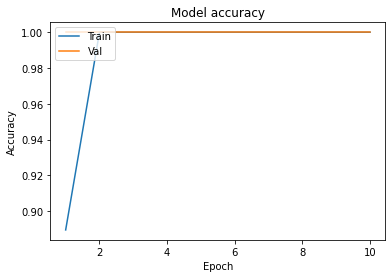

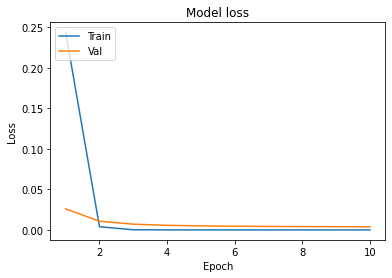

In [ ]:
plot_learningCurve(history, 10)

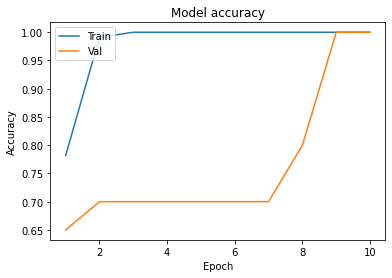

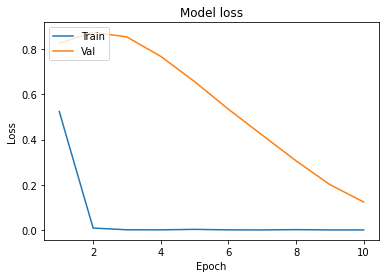

In [ ]:
plot_learningCurve(history1, 10)

#Confusion Matrix

In [ ]:
import mlxtend 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Gyro

In [ ]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
mat = confusion_matrix(y_test, y_pred)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f686cfa0be0>)

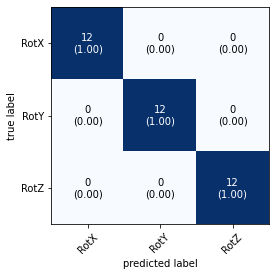

In [ ]:
plot_confusion_matrix(conf_mat=mat,show_absolute=True,show_normed=True,hide_spines=False,class_names=label.classes_)

##Acc

In [ ]:
y_pred1 = model1.predict_classes(X_test1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
x=model1.predict(X_test1)
x

array([[1.55890778e-01, 8.32745880e-02, 7.60834634e-01],
       [2.21909366e-10, 1.00000000e+00, 1.38709285e-14],
       [3.26890647e-01, 9.64829922e-02, 5.76626301e-01],
       [5.32956967e-09, 1.00000000e+00, 2.09441263e-15],
       [9.99999762e-01, 1.87010357e-07, 1.62819333e-14],
       [9.98685062e-01, 1.31482340e-03, 8.65309531e-08],
       [9.99949574e-01, 5.04074633e-05, 2.45506476e-10],
       [9.99086142e-01, 9.13870696e-04, 9.88524107e-09],
       [9.99999285e-01, 7.56296629e-07, 7.51690580e-14],
       [1.00000000e+00, 1.76711641e-08, 1.39494087e-14],
       [2.51987875e-01, 1.99103236e-01, 5.48908889e-01],
       [1.20445790e-07, 9.99999881e-01, 7.04599183e-12],
       [2.21740855e-11, 1.00000000e+00, 1.20795369e-13],
       [2.26502763e-07, 9.99999762e-01, 9.39858339e-14],
       [6.79287538e-02, 1.96925312e-01, 7.35145986e-01],
       [8.96810144e-02, 1.47261634e-01, 7.63057411e-01],
       [4.38560932e-07, 9.99999523e-01, 1.14595161e-12],
       [2.30763212e-01, 1.39864

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f686c6be4a8>)

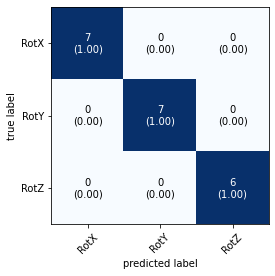

In [ ]:
mat1 = confusion_matrix(y_test1, y_pred1)
plot_confusion_matrix(mat1,show_absolute=True,show_normed=True,hide_spines=False,class_names=label.classes_)

#Testing

In [ ]:
Tester = []
# Tester.append("X1")
# Tester.append("Y1")
# Tester.append("Z1")
Tester.append("tnew")
Gyro=[]
Acc=[]
for action in Tester:
  xx = pd.read_csv(action+'.csv',names=["Type","X","Y","Z"])
  data_gyro=[]
  data_gyro = xx[xx.Type==1]
  data_gyro = data_gyro[['X','Y', 'Z']]
  data_acc=[]
  data_acc = xx[xx.Type==2]
  data_acc = data_acc[['X','Y', 'Z']]
  for index,row in data_gyro.iterrows():
    Gyro.append([action,row['X'],row['Y'],row['Z']])
  for index,row in data_acc.iterrows():
    Acc.append([action,row['X'],row['Y'],row['Z']])


columns = ['action','x', 'y', 'z']
dataGyro = pd.DataFrame(data = Gyro, columns = columns)
dataAcc = pd.DataFrame(data = Acc, columns = columns)

dataAcc['label'] = label.fit_transform(dataAcc['action'])

print(dataAcc)
X1 = dataAcc[['x', 'y', 'z']]
X = dataGyro[['x', 'y', 'z']]
y1 = dataAcc['label']


dataAcc['label'] = label.fit_transform(dataAcc['action'])

scaler = StandardScaler()
# X1 = scaler.fit_transform(X1)
scaled_X1 = pd.DataFrame(data = X1, columns = ['x', 'y', 'z'])
scaled_X1['label'] = y1.values

print(scaled_X1)

X1, y1 = get_frames(scaled_X1, frame_size, hop_size)
print(y1)
train1=X1.shape

X1 = X1.reshape(train1[0],train1[1],train1[2],1)
X1

y = model.predict_classes(X1)
Arr0=0
Arr1=0
Arr2=0
Arr3=0
print(y)
for i in y:
  if(i==0):
    Arr0+=1
  elif(i==1):
    Arr1+=1
  elif(i==2):
    Arr2+=1
  else:
    Arr3+=1

print(Arr0/y.size,Arr1/y.size,Arr2/y.size,Arr3/y.size)

y2=model.predict(X1)
print(y2)


In [ ]:
def getMaximum(output):
  Max=-1
  ans=-1
  # print(output)
  for i in range(0,output.size-1,1):
    if(output[0][i]>Max):
      Max=output[0][i]
      ans=i
  return ans

In [ ]:
interpreter = tf.lite.Interpreter(model_path="/content/modelAcc.tflite")
interpreter.allocate_tensors()


input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
print(input_data.shape)
length=X1.shape[0]
print(t)
results = [0,0,0]
for i in range(0,length,1):
  t=X1[i].shape
  y1 = X1[i]
  y1 = y1.reshape(1,t[0],t[1],t[2])
  # print(y1.shape)
  y1=np.array(y1,dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], y1)

  interpreter.invoke()

  output_data = interpreter.get_tensor(output_details[0]['index'])
  print(output_data)
  results[(getMaximum(output_data))]+=1
print(results)

(1, 80, 3, 1)
(80, 3, 1)
[[9.9965978e-01 2.0099420e-04 1.3916355e-04]]
[[9.9981886e-01 5.2989741e-05 1.2815224e-04]]
[[9.9992406e-01 2.1210895e-05 5.4685024e-05]]
[[9.9998736e-01 4.2536940e-06 8.3699879e-06]]
[[9.99581516e-01 1.05537576e-04 3.12919175e-04]]
[[9.9987531e-01 1.7145536e-05 1.0746908e-04]]
[[9.9999011e-01 2.5504241e-06 7.3907222e-06]]
[[9.9955434e-01 9.8498705e-05 3.4707406e-04]]
[[9.9883229e-01 1.5309155e-04 1.0146443e-03]]
[[9.9994636e-01 9.3904409e-06 4.4187342e-05]]
[[9.9941874e-01 2.0639802e-04 3.7496074e-04]]
[[9.9986529e-01 3.8097318e-05 9.6582349e-05]]
[[9.9968278e-01 9.5253024e-05 2.2199540e-04]]
[13, 0, 0]


#Android Integration

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model1)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the model.
with open('modelAcc4.tflite', 'wb') as f:
  f.write(tflite_model)


converterGyro = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model_Gyro = converterGyro.convert()

# Save the model.
with open('GyroModel.tflite', 'wb') as f:
  f.write(tflite_model_Gyro)



print (label.classes_)

labels = '\n'.join(sorted(label.classes_))

with open('labelsGyro.txt', 'w') as f:
  f.write(labels)



from google.colab import files
files.download('modelAcc4.tflite')
files.download('labelsGyro.txt')
files.download('GyroModel.tflite')

INFO:tensorflow:Assets written to: /tmp/tmpym5edbun/assets


INFO:tensorflow:Assets written to: /tmp/tmpym5edbun/assets


INFO:tensorflow:Assets written to: /tmp/tmp3owxj4xz/assets


INFO:tensorflow:Assets written to: /tmp/tmp3owxj4xz/assets


['S1' 'X1' 'XY' 'Y1' 'Z1']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print (label.classes_)

['CircleXY1' 'X1' 'Y1' 'Z1']


##ACC

In [ ]:
saved_model_dir = 'save/fine_tuning1'
tf.saved_model.save(model1, saved_model_dir)

converter11 = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model11 = converter11.convert()

with open('model_Acc.tflite', 'wb') as f:
  f.write(tflite_model11)
f.close

INFO:tensorflow:Assets written to: save/fine_tuning1/assets


INFO:tensorflow:Assets written to: save/fine_tuning1/assets


<function BufferedWriter.close>

##Gyro

In [ ]:
print (label.classes_)

labels = '\n'.join(sorted(label.classes_))

with open('labels.txt', 'w') as f:
  f.write(labels)

['Testlast']


In [ ]:
from google.colab import files

files.download('model_Acc.tflite')
files.download('labels.txt')
# files.download('model_Gyro.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model1 = Sequential()
model1.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train1[0].shape))
model1.add(BatchNormalization(axis=-1))

model1.add(Conv2D(32, (2, 2), activation='relu'))
model1.add(BatchNormalization(axis=-1))


model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))

model1.add(Dense(len(Gesture), activation='softmax'))